In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../Dataset/cleaned_failure_data.csv')
print(df)

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0     3416     L50595    L                301.4                    310.4   
1     7130     L54309    L                300.6                    310.0   
2     2320     M17179    M                299.2                    308.8   
3     9601     M24460    M                298.9                    310.0   
4      614     L47793    L                298.1                    309.9   
...    ...        ...  ...                  ...                      ...   
9995  9018     M23877    M                297.3                    308.1   
9996  3339     M18198    M                301.6                    310.9   
9997  5771     L52950    L                301.6                    311.2   
9998  3056     L50235    L                300.1                    309.2   
9999  6026     L53205    L                300.7                    311.0   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0       

In [2]:
columns=[
            'Air temperature [K]', 
            'Process temperature [K]', 
            'Rotational speed [rpm]', 
            'Torque [Nm]', 
            'Tool wear [min]'
                ]

In [13]:
operating_ranges= df[columns].agg(['min', 'max', 'mean', 'std']).transpose()
operating_ranges.columns=['Minimum', 'Maximum', 'Mean', 'Standard Deviation']
print(operating_ranges)

                         Minimum  Maximum         Mean  Standard Deviation
Air temperature [K]        295.3    304.5   300.008590            1.999148
Process temperature [K]    305.7    313.8   310.011580            1.480138
Rotational speed [rpm]    1168.0   2886.0  1538.776100          179.284096
Torque [Nm]                  3.8     76.6    39.986910            9.968934
Tool wear [min]              0.0    253.0   108.219525           63.612534


In [14]:
grouped_entries=df.groupby('Type')[columns].agg(['min', 'max', 'mean', 'std'])
grouped_entries

Air temperature [K]                              Process temperature [K]  \
                     min    max        mean       std                     min   
Type                                                                            
H                  295.5  304.2  299.850494  1.991768                   305.9   
L                  295.3  304.5  300.025291  1.990151                   305.7   
M                  295.3  304.4  300.027546  2.017793                   305.7   

                                  Rotational speed [rpm]                     \
        max        mean       std                    min   max         mean   
Type                                                                          
H     313.5  309.943547  1.488061                   1212  2636  1538.147557   
L     313.8  310.025241  1.469615                   1181  2886  1539.469167   
M     313.8  310.006321  1.498379                   1168  2710  1537.598932   

                 Torque [Nm]                             Tool wear [min]  \
             std         min   max       mean        std             min   
Type                                                                       
H     173.133428        12.8  72.8  39.838285   9.642339             0.0   
L     180.428518         3.8  76.6  39.996600  10.012335             0.0   
M     179.059828         9.7  76.2  40.017251   9.992153             0.0   

                                    
        max        mean        std  
Type                                
H     246.0  107.919747  63.191861  
L     251.0  108.673647  64.066117  
M     253.0  107.402959  62.842395

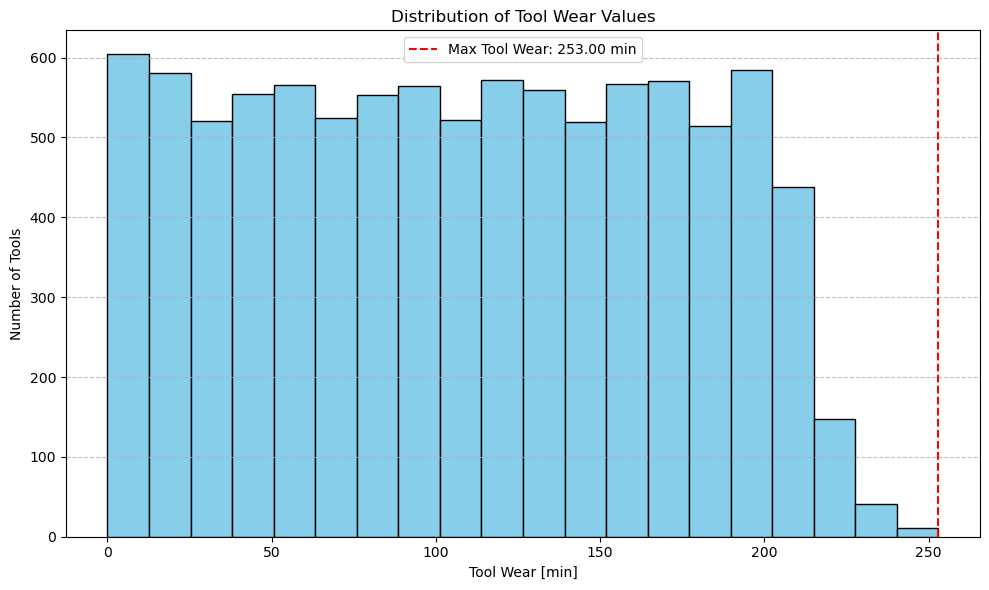

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Tool wear [min]'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tool Wear Values')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Number of Tools')
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Adding a vertical line for the maximum tool wear
max_tool_wear = df['Tool wear [min]'].max()
plt.axvline(max_tool_wear, color='red', linestyle='dashed', linewidth=1.5, label=f'Max Tool Wear: {max_tool_wear:.2f} min')

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [40]:
total_failures= df['Machine failure'].sum()
failure_percentage=total_failures/len(df['Machine failure'])*100
print(f"Total failure:", total_failures)
print(f"Failure Percentage", failure_percentage)

Total failure: 339
Failure Percentage 3.39


In [41]:
failures_by_quality=df.groupby('Type')['Machine failure'].sum()
print(failures_by_quality)

Type
H     21
L    235
M     83
Name: Machine failure, dtype: int64


In [42]:
failure_columns = ['TWF', 'HDF', 'PWF', 'OSF','RNF']
failures_by_cause = df[failure_columns].sum()
print(failures_by_cause)

TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64


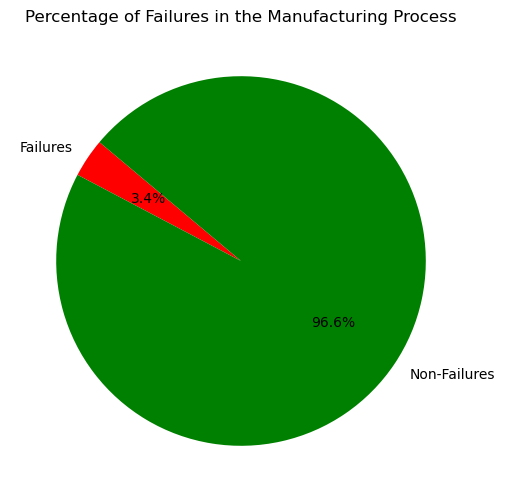

In [43]:
total_records=len(df)
failure_counts = [total_failures, total_records - total_failures]
labels = ['Failures', 'Non-Failures']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(failure_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'green'], startangle=140)
plt.title('Percentage of Failures in the Manufacturing Process')
plt.show()

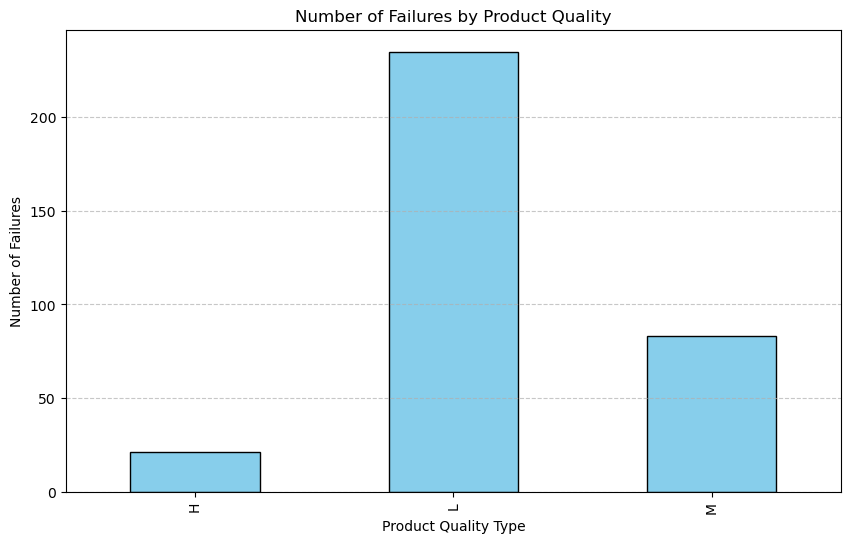

In [44]:
# Plotting the bar chart for failures by product quality
failures_by_quality.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Number of Failures by Product Quality')
plt.xlabel('Product Quality Type')
plt.ylabel('Number of Failures')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

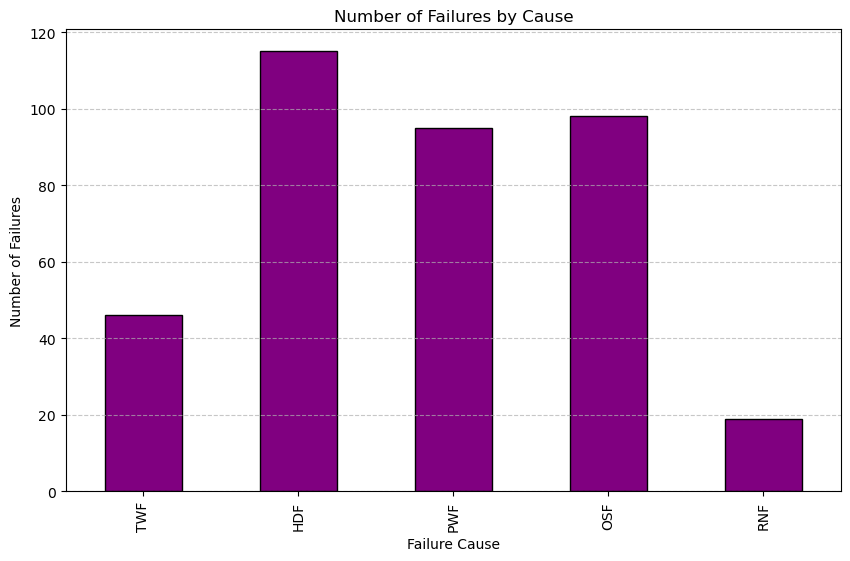

In [46]:
failures_by_cause.plot(kind='bar', color='purple', edgecolor='black', figsize=(10, 6))
plt.title('Number of Failures by Cause')
plt.xlabel('Failure Cause')
plt.ylabel('Number of Failures')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
machine_settings = ['Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]']

# List of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Analyze correlation between machine settings and failures
correlation_results = {}
for failure in failure_types:
    correlations = df[machine_settings + [failure]].corr()[failure].drop(failure)
    correlation_results[failure] = correlations

# Display correlation results
for failure, corr_values in correlation_results.items():
    print(f"Correlation between machine settings and {failure}:")
    print(corr_values, "\n")

Correlation between machine settings and TWF:
Torque [Nm]               -0.014662
Air temperature [K]        0.009531
Process temperature [K]    0.010234
Rotational speed [rpm]     0.010389
Name: TWF, dtype: float64 

Correlation between machine settings and HDF:
Torque [Nm]                0.142610
Air temperature [K]        0.137731
Process temperature [K]    0.057215
Rotational speed [rpm]    -0.121241
Name: HDF, dtype: float64 

Correlation between machine settings and PWF:
Torque [Nm]                0.083781
Air temperature [K]        0.004529
Process temperature [K]   -0.004306
Rotational speed [rpm]     0.123018
Name: PWF, dtype: float64 

Correlation between machine settings and OSF:
Torque [Nm]                0.183465
Air temperature [K]       -0.000433
Process temperature [K]    0.004988
Rotational speed [rpm]    -0.104575
Name: OSF, dtype: float64 

Correlation between machine settings and RNF:
Torque [Nm]                0.016136
Air temperature [K]        0.022905
Process te

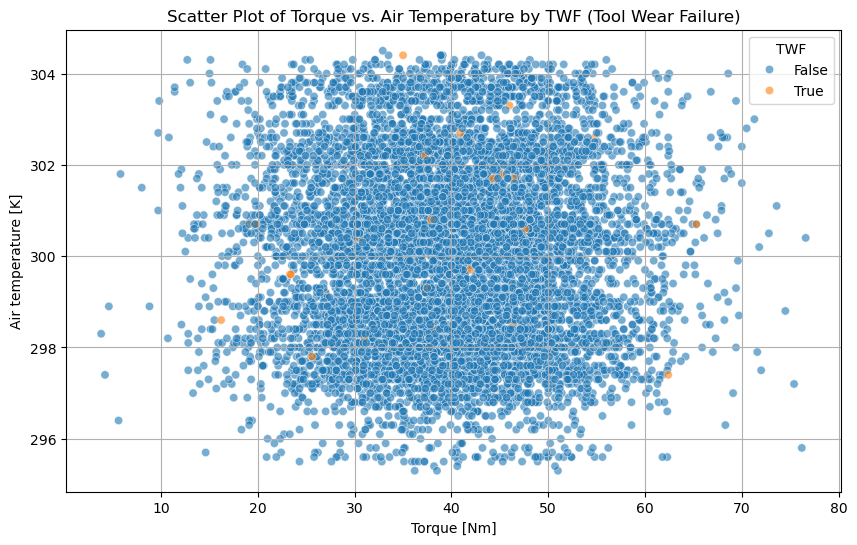

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Torque [Nm]', y='Air temperature [K]', hue='TWF', data=df, alpha=0.6)
plt.title('Scatter Plot of Torque vs. Air Temperature by TWF (Tool Wear Failure)')
plt.xlabel('Torque [Nm]')
plt.ylabel('Air temperature [K]')
plt.legend(title='TWF')
plt.grid(True)
plt.show()

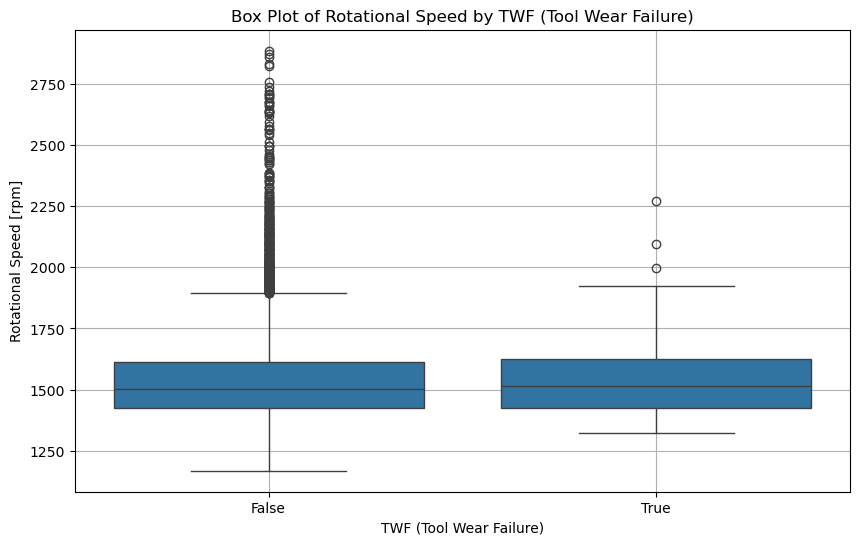

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TWF', y='Rotational speed [rpm]', data=df)
plt.title('Box Plot of Rotational Speed by TWF (Tool Wear Failure)')
plt.xlabel('TWF (Tool Wear Failure)')
plt.ylabel('Rotational Speed [rpm]')
plt.grid(True)
plt.show()